## Parameter Optimization of SVM

Name: Harshit

Roll No.: 102103461

# Importing Libraries

In [5]:
!pip install bayesian-optimization
!pip install ucimlrepo


In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization
from ucimlrepo import fetch_ucirepo


# Fetching and Organizing Dataset

In [7]:
# Fetching dataset
dry_bean = fetch_ucirepo(id=602)

# Organizing data
X = dry_bean.data.features
y = dry_bean.data.targets

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)


# Defining Optimization Parameter Ranges

In [8]:
# Defining optimization parameter ranges
kernels = ['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}


# Function for Evaluating SVM

In [9]:
# Function to evaluate SVM with given parameters
def evaluate_svm(kernel, nu, tol):
    kernel_name = kernels[int(kernel)]
    model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


# Bayesian Optimization for Multiple Samples

In [10]:
# Performing Bayesian Optimization for multiple samples
results = []
targets = []
iteration_counts = []

for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))

    # Storing target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])


|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.6229    | 1.074     | 0.09479   | 0.3617    |
| 2         | 0.4194    | 1.4       | 0.08128   | 0.7524    |
| 3         | 0.4297    | 0.9217    | 0.04607   | 0.4222    |
| 4         | 0.5411    | 0.891     | 0.05898   | 0.9236    |
| 5         | 0.5272    | 0.05005   | 0.05333   | 0.8847    |
| 6         | 0.3803    | 0.3268    | 0.03164   | 0.06096   |
| 7         | 0.5196    | 0.3138    | 0.06116   | 0.5118    |
| 8         | 0.6822    | 1.908     | 0.0375    | 0.6207    |
| 9         | 0.2223    | 0.6744    | 0.02644   | 0.4024    |
| 10        | 0.3073    | 1.352     | 0.04912   | 0.7101    |
| 11        | 0.5321    | 1.9       | 0.03942   | 0.6188    |
| 12        | 0.4513    | 0.08933   | 0.06132   | 0.9808    |
| 13        | 0.4383    | 1.07      | 0.09952   | 0.3559    |
| 14        | 0.585     | 1.082     | 0.08459   | 0.3662    |
| 15    

# Visualization of Convergence Plots

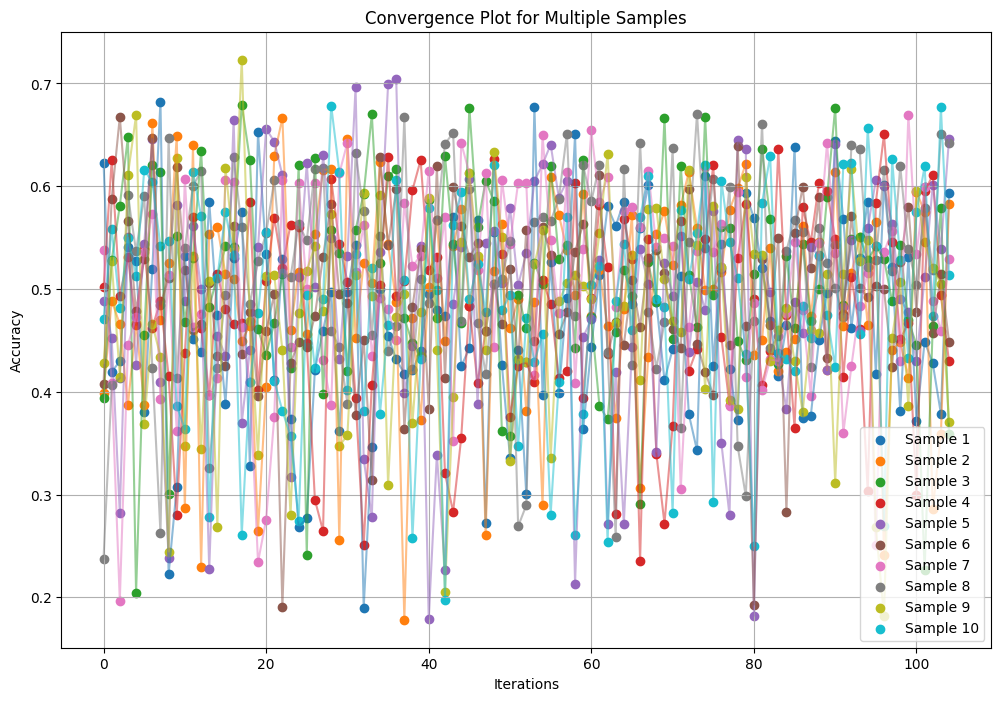

In [15]:
# Visualizing convergence plots for each sample with scatter plot
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.scatter(range(iteration_counts[i]), targets[i][:iteration_counts[i]], label=f"Sample {i+1}", marker='o')

    # Connect points with lines
    plt.plot(range(iteration_counts[i]), targets[i][:iteration_counts[i]], linestyle='-', alpha=0.5)

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot for Multiple Samples')
plt.legend()
plt.grid(True)
plt.show()


# Creating DataFrame for Results

In [12]:
# Creating DataFrame to display results
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)


   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.682174  {'kernel': 1.90800741109412, 'nu': 0.037503929...
1       1       0.666503  {'kernel': 1.8114357145187279, 'nu': 0.0998390...
2       2       0.679481  {'kernel': 1.4373160018749045, 'nu': 0.0227544...
3       3       0.650343  {'kernel': 1.1125746064457178, 'nu': 0.0107468...
4       4       0.704456  {'kernel': 1.8484314988280484, 'nu': 0.0189461...
5       5       0.667483  {'kernel': 1.283052265217466, 'nu': 0.08774644...
6       6       0.669442  {'kernel': 1.1815403061700793, 'nu': 0.0263232...
7       7       0.670666  {'kernel': 1.732512611602361, 'nu': 0.05340136...
8       8       0.723066  {'kernel': 1.6277672767258768, 'nu': 0.0337934...
9       9       0.678501  {'kernel': 1.2724292372874637, 'nu': 0.0501690...


# Finding Sample with Maximum Accuracy

In [13]:
# Finding sample with maximum accuracy
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"\nSample with maximum accuracy: {max_accuracy_sample['Sample']}")



Sample with maximum accuracy: 8


# Plotting Convergence for Maximum Accuracy Sample

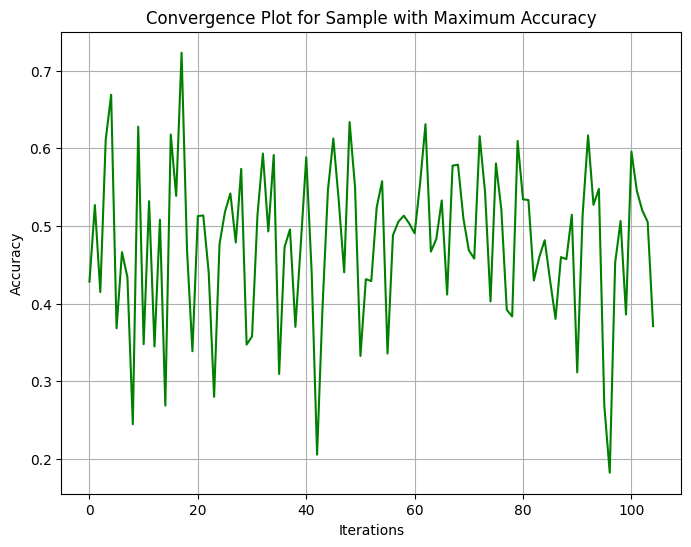

In [14]:
# Plotting convergence for sample with maximum accuracy
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
plt.figure(figsize=(8, 6))
plt.plot(range(iteration_counts[max_accuracy_optimizer_idx]),
         targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]], color='green')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot for Sample with Maximum Accuracy')
plt.grid(True)
plt.show()
